(lecture05:homework)=
# Homework 5

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you can either:
    
    - Type the answer using the built-in latex capabilities. In this case, simply export the notebook as a pdf and upload it on gradescope; or
    - You can print the notebook (after you are done with all the code), write your answers by hand, scan, turn your response to a single pdf, and upload on gradescope.

+ The total homework points are 100. Please note that the problems are not weighed equally.

```{note}
+ Please match all the pages corresponding to each of the questions when you submit on gradescope.
```

## Student details

+ **First Name:** Archit
+ **Last Name:** Banerjee
+ **Email:** banerj94@purdue.edu

Again, let me set you up with some code for plotting:

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', 'svg')

/tmp/ipython-input-367591302.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina', 'svg')


## Problem 1 - Analysis of experimental srtess-strain curves of alluminum 6061-T651

You are going to analyze the dataset collected by {cite}`AAKASH2019104085`.
They perform two types of experiments.
We are going to focus on the "uniaxial tension experiment."
This is what it is all about:
+ They took several speciments of alluminum 6061-T651 ([a high-temperature alluminum alloy](https://en.wikipedia.org/wiki/6061_aluminium_alloy)).
+ The shape of these speciments is like this:

```{figure} https://ars.els-cdn.com/content/image/1-s2.0-S2352340919304391-gr1_lrg.jpg
---
height: 300px
name: directive-fig
---
Geometry of the uniaxial tension specimen.
```
+ They mounted the speciment (using the holes you see on the sides) on a machine that applies tension:

```{figure} https://ars.els-cdn.com/content/image/1-s2.0-S2352340919304391-gr5_lrg.jpg
---
height: 300px
name: directive-fig2
---
The mounted specimen.
```
+ They controlled the temperature of the specimen.
+ They applied tension gradually until the speciment broke, recorging at each step the strain (% change in length) and the stress (force per cross section area in MPa - megaPascal).

I suggest that you skim through the paper if you want to understand more about the details of the experiment.
Measuring the strains and stresses is not as straightforward as it sounds...

Our goal is to download the data, and for a fixed temperature, create a model for the stress-strain relation.
We are going to do some of the low level stuff.
But, I am going to guide you through this.

+ First, download the complete zipped data from [here](https://data.mendeley.com/datasets/rd6jm9tyb6/2) and unzip it in the directory of your Jupyter notebook.
You have two options. Either do it mannually as we did in {ref}`lecture03:homework` or run the code segment below to do it from this Jupyter notebook:

In [51]:
# follow redirects (-L), use server's filename (-J), and write to that name (-O)
!curl -L -J -O 'https://data.mendeley.com/public-files/datasets/rd6jm9tyb6/files/559cd828-c044-418a-837c-35ce161c02ab/file_downloaded'

# sanity check: is it actually a zip?
!ls -lh
!file ./*

# unzip whatever came down (often there’s exactly one .zip)
!unzip -o *.zip

# if there are nested zips, expand them too
!unzip -o "*.zip"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   134  100   134    0     0    320      0 --:--:-- --:--:-- --:--:--   319
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
curl: (23) Failed writing header
total 7.0M
-rw-r--r-- 1 root root  35K May 21  2019 P_020_F_1_017_198_18.csv
-rw-r--r-- 1 root root  33K May 21  2019 P_020_F_2_018_202_19.csv
-rw-r--r-- 1 root root  35K May 21  2019 P_020_F_3_019_208_25.csv
-rw-r--r-- 1 root root  37K May 21  2019 P_020_G_1_021_197_16.csv
-rw-r--r-- 1 root root  37K May 21  2019 P_020_G_2_022_195_24.csv
-rw-r--r-- 1 root root  39K May 21  2019 P_020_G_3_023_203_17.csv
-rw-r--r-- 1 root root  34K May 21  2019 P_020_H_1_025_199_09.csv
-rw-r--r-- 1 root root  39K May 21  2019 P_020_H_2_026_204_18.csv
-rw-r--r-- 1 root root  34K May 21  2019 P_020_H_3_027_206_11.csv
-rw-r--r-- 1 root root  41K May 21  2019 P_020

+ Now read the data description [here](https://data.mendeley.com/datasets/rd6jm9tyb6/2) very carefully and find a filename that contains data from a uniaxial tension test of 200 degrees C. There multiple files that fit this description. Just pick one of them.

In [52]:
filename = 'T_200_A_1_094_041_14.csv'
print('The file I picked is: ', filename)

The file I picked is:  T_200_A_1_094_041_14.csv


+ Load the file in a dataframe and print it.

In [53]:
# your code here
import pandas as pd

df = pd.read_csv(filename)
display(df.head())

,Strain,Stress_MPa
0,0.000070,-0.950199
1,0.000044,0.160190
2,0.000030,1.854753
3,0.000023,3.719668
4,0.000017,6.722914


+ Plot the stress as a function of the strain. Please label your axes properly.

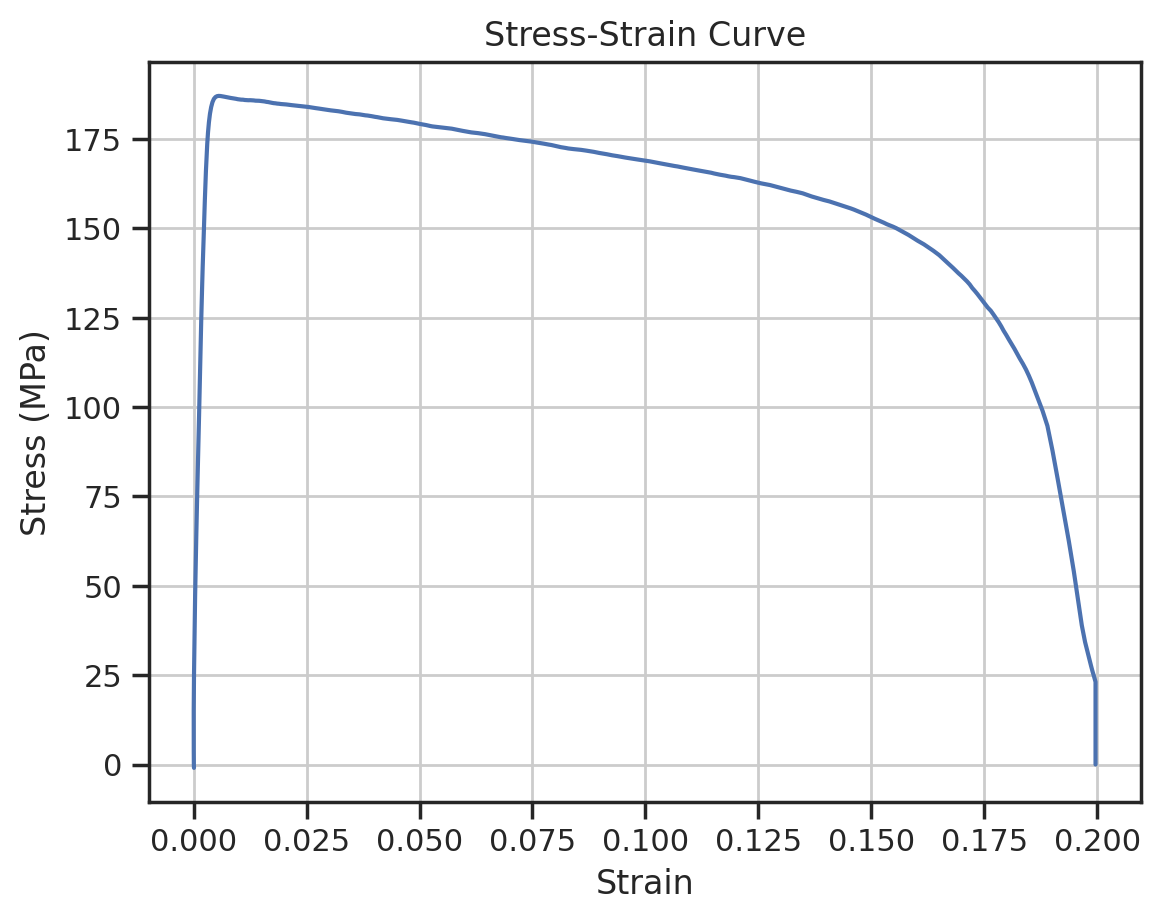

In [54]:
# your code here
plt.figure()
plt.plot(df['Strain'], df['Stress_MPa'])
plt.xlabel('Strain')
plt.ylabel('Stress (MPa)')
plt.title('Stress-Strain Curve')
plt.grid(True)
plt.show()

+ The [ultimate tensile strength](https://en.wikipedia.org/wiki/Ultimate_tensile_strength) (or just "the strength") of a material is the maximum stress that develops under tension before the material breaks. What is the strength of this alluminum alloy? Please, provide your answer below using the `print()` function with a precision of 2 decimal points. How does your answer compare with the strength range for allumunum alloys reported in [wikipedia](https://en.wikipedia.org/wiki/6061_aluminium_alloy)?

In [55]:
# your code here
ultimate_tensile_strength = df['Stress_MPa'].max()
print(f"The ultimate tensile strength of this aluminum alloy is: {ultimate_tensile_strength:.2f} MPa")

The ultimate tensile strength of this aluminum alloy is: 187.06 MPa


+ Let's zoom in to low strains. Plot the first 200 observations points of the stress-strain curve.

Text(0, 0.5, 'Stress (MPa)')

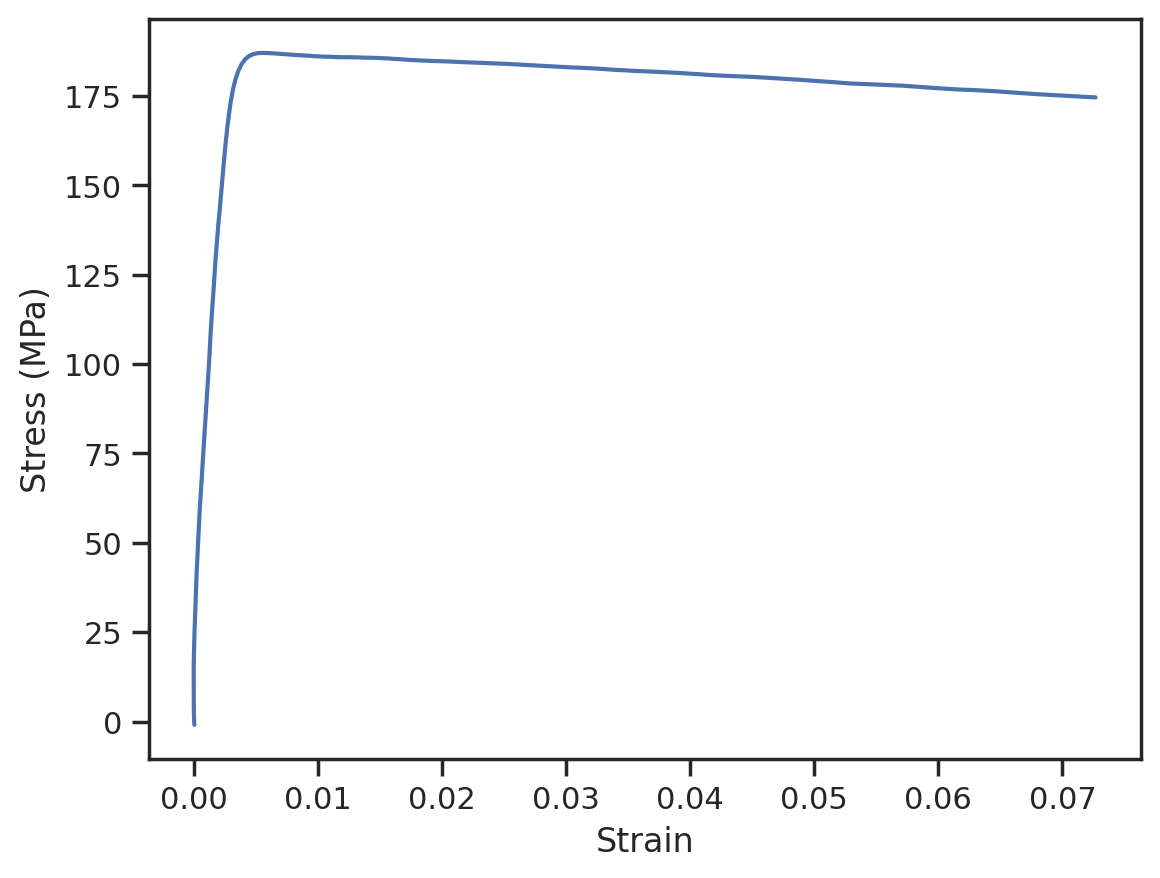

In [56]:
# your code here
plt.figure()
plt.plot(df['Strain'][:200], df['Stress_MPa'][:200])
plt.xlabel('Strain')
plt.ylabel('Stress (MPa)')

+ Observe that the experimental data are behaving strangely at very small strains. As a matter of fact, we are getting a few negative strains at the beginning.
Let's throw these observartions away. Start by finding the index $i$ for which `df['Strain'][i]` becomes positive for the first time. You can do this by a visual inspection of `df['Strain'][:30]`.

In [57]:
# your code here
i = df[df['Strain'] > 0].index[0]

+ Make a new dataframe, call it `clean_df` where you have thrown away the initial data. Then plot the first 200 observations of `clean_df`.

Text(0, 0.5, 'Stress (MPa)')

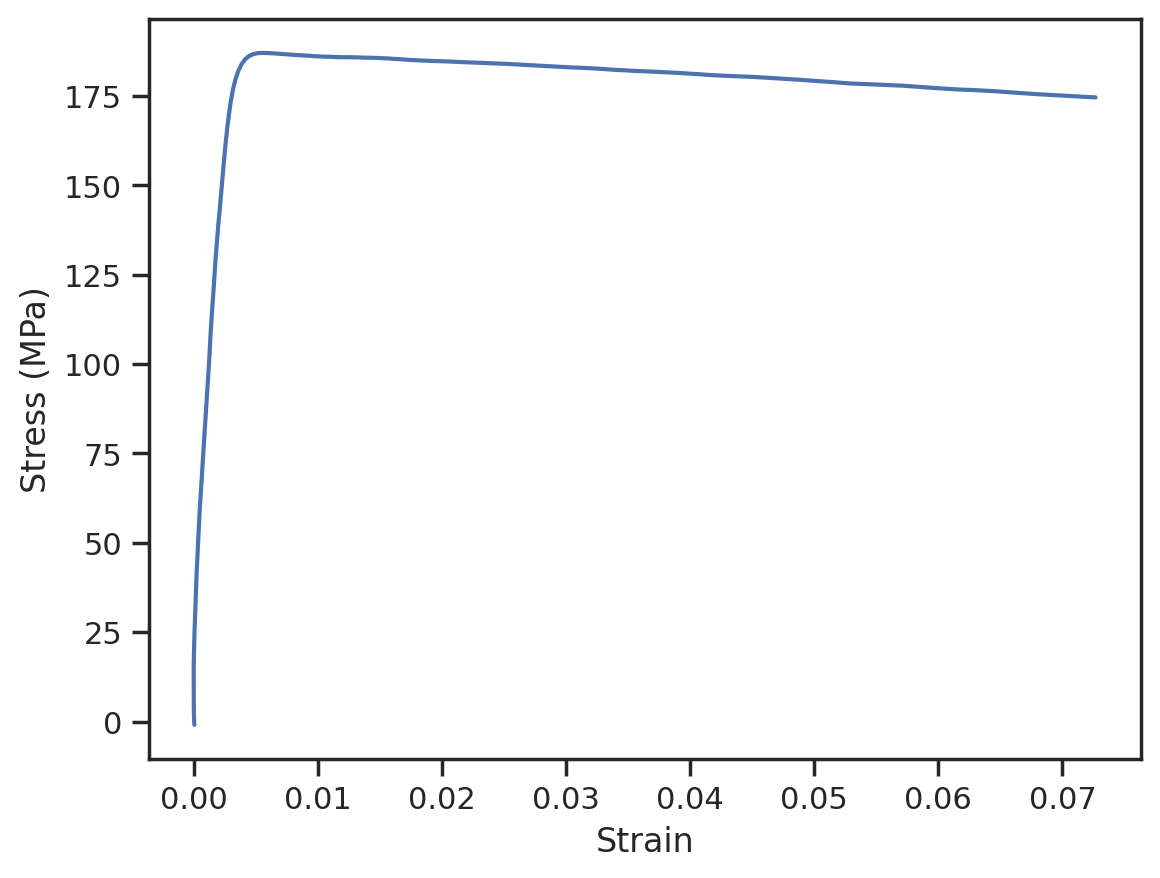

In [58]:
# your code here
clean_df = df[i:]
plt.figure()
plt.plot(clean_df['Strain'][:200], clean_df['Stress_MPa'][:200])
plt.xlabel('Strain')
plt.ylabel('Stress (MPa)')

+ Observe that initially the stress-strain relation is linear. This is the so-called *elastic regime*.
If you deform the material within this regime, it will return to its undeformed state without any permanent deformation effects.
If you deform the material beyond the elastic regime, then you start having what we call *plasticity*.
We are now going to focus exclusively on the linear regime.
Find an index $j$ so that `clean_df[:j]` is fully within the linear regime.
Make a new dataframe, say `linear_df` containing only these data.
You should probably pick $j$ by visual inspection.
And it is not important to pick the maximum $j$ with this property.
Just find one.

In [59]:
# your code here
j = 1500
linear_df = clean_df[:j]

+ In the elastic regime, the stress $\sigma$ is a linear function of the strain $\epsilon$:

$$
\sigma = E\epsilon.
$$

The constant $E$ is called Young's modulus and it has units of GPa (GigaPascal).
Make a function `sigma(epsilon, E)` that calculates the stress given the strain for any Young's modulus. Properly document the docstring of your function.

In [60]:
# your code here
def sigma(epsilon, E):
    """
    Calculate the stress given the strain for any Young's modulus.

    Parameters
    ----------
    epsilon : float
        The strain.
    E : float
        The Young's modulus.

    Returns
    -------
    float
        The stress.
    """
    # Convert E from GPa to MPa for consistency with stress data
    return E * 1000 * epsilon

In [61]:
# Try your function here:
sigma(linear_df['Strain'], 68)

,Strain
0,4.753105
1,2.990203
2,2.045968
3,1.596917
4,1.179914
...,...
395,13509.556366
396,13530.141018
397,13553.210422
398,13575.500619


+ If you pay close attention to the data in `linear_df` they do not cross zero.
This is due to a systematic bias in the experiment.
However, this bias is not important for calibrating Young's modulus $E$.
Only the slope of the curve is important for finding $E$.
So, let's make yet another dataframe (I promise you this is the last one) called `clean_linear_df` which removes this systematic bias.
The dataframe `clean_linear_df` should contain the same data as `linear_df` but
    + The strains should all be shifted by the minimum strain in `linear_df`. In other words, subtract from the strains in `clean_linear_df` the smallest strain in `linear_df`, i.e., subtract `linear_df['Strain'].min()`.
    + The stresses should all be shifted by the minimum stress in `linear_df`.

In [62]:
# your code here
clean_linear_df = linear_df.copy()
clean_linear_df['Strain'] = linear_df['Strain'] - linear_df['Strain'].min()
clean_linear_df['Stress_MPa'] = linear_df['Stress_MPa'] - linear_df['Stress_MPa'].min()

+ Use visual inspection to find a value for the Young's modulus that matches the data in `clean_linear_df`.
Hints: Remember that the stress $\sigma$ is in MPa so you will have to change the units correctly if you $E$ is expressed in GPa.

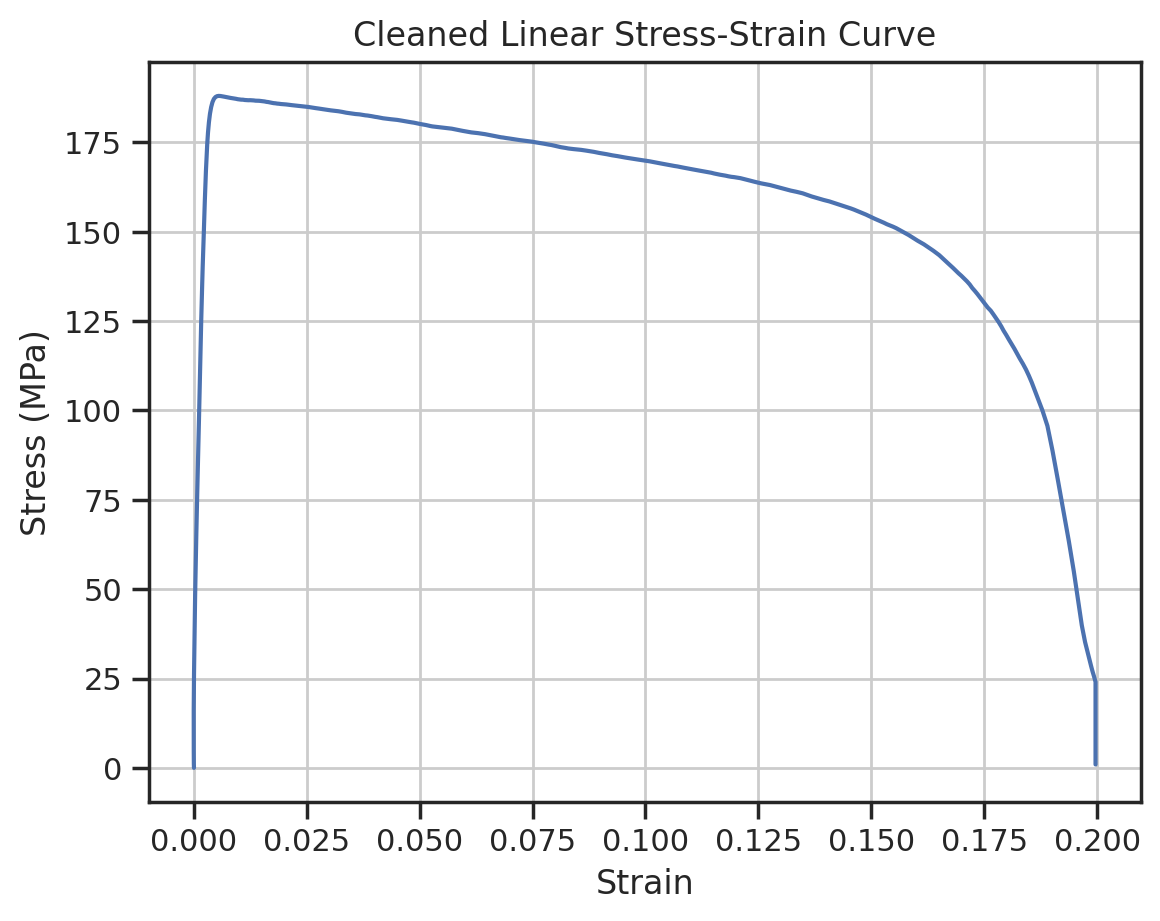

In [63]:
plt.figure()
plt.plot(clean_linear_df['Strain'], clean_linear_df['Stress_MPa'])
plt.xlabel('Strain')
plt.ylabel('Stress (MPa)')
plt.title('Cleaned Linear Stress-Strain Curve')
plt.grid(True)
plt.show()

In [64]:
# your code here
import numpy as np

# Fit a first-degree polynomial (linear fit) to the cleaned linear data
# The coefficients are ordered from highest degree to lowest, so the first coefficient is the slope (E)
coefficients = np.polyfit(clean_linear_df['Strain'], clean_linear_df['Stress_MPa'], 1)
E_calculated = coefficients[0]

print(f"Calculated Young's Modulus (E): {E_calculated:.2f} MPa")
# Convert E to GPa for comparison with Wikipedia
print(f"Calculated Young's Modulus (E): {E_calculated/1000:.2f} GPa")

Calculated Young's Modulus (E): -183.44 MPa
Calculated Young's Modulus (E): -0.18 GPa


+ How does what you found compare to the [wikipedia](https://en.wikipedia.org/wiki/6061_aluminium_alloy) reported Young's modulus for this material? Why do you think yours is lower/higher? You may want to repeat the analysis above for another experiment with lower temperature (say at room temperature).

In [65]:
# your answer here



The value from wikipedia seems to be 68. The value that I got is -0.18.

Run the following code to convert the notebook to a pdf. Verify that the file path to the notebook is correct.

In [66]:
from google.colab import drive
drive.mount('/content/drive')
!apt-get install inkscape texlive texlive-xetex texlive-latex-extra pandoc --quiet
!pip install pypandoc --quiet
!jupyter nbconvert --to PDF '/content/drive/MyDrive/Colab Notebooks/Copy of homework_05.ipynb'

Mounted at /content/drive
Reading package lists...
Building dependency tree...
Reading state information...
pandoc is already the newest version (2.9.2.1-3ubuntu2).
pandoc set to manually installed.
The following additional packages will be installed:
  aspell aspell-en dictionaries-common dvisvgm enchant-2 fig2dev
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 gawk ghostscript glib-networking glib-networking-common
  glib-networking-services gsettings-desktop-schemas gsfonts hunspell-en-us
  imagemagick imagemagick-6-common imagemagick-6.q16 lib2geom1.1.0
  libapache-pom-java libaspell15 libatkmm-1.6-1v5 libcairomm-1.0-1v5
  libcdr-0.1-1 libcommons-logging-java libcommons-parent-java libdbus-glib-1-2
  libdjvulibre-text libdjvulibre21 libenchant-2-2 libfftw3-double3
  libfontbox-java libglibmm-2.4-1v5 libgs9 libgs9-common libgsl27 libgslcblas0
  libgspell-1-2 libgspell-1-common libgtkmm-3.0-1v5 libhunspell-1.7-0 libidn12
  libijs-0.35 